In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing all required packages
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 1. Data Understanding and Exploration

In [2]:
#Reading data
df=pd.read_csv("train.csv")
pd.set_option('display.max_columns', 100)
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [3]:
df.shape

(1460, 81)

In [4]:
# Data has three data types float, int and object and there exist columns which consist of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Summary Statistics of Data
pd.set_option('display.max_columns', 100)
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

# 2.)Data Cleaning

In [6]:
#checking the number of null values in the dataset
df.isnull().sum()  

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Checking the percentage of missing values in each column.
pd.set_option('display.max_rows', 400)
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Null value treatment
#### Instead of dropping the the columns having null values more than 40%, which will result in a data loss.So we will impute the null values according to the domain understanding and the data dictionary provided with the data

In [8]:
#NA in Alley column means No Alley, so we will replace NA by it.
df['Alley'].fillna('No Alley', inplace=True)
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
df['FireplaceQu'].fillna('No Fireplace', inplace=True)
#NA in PoolQC column means No Pool, so we will replace NA by it.
df['PoolQC'].fillna('No Pool', inplace=True) 
#NA in Fence column means No Fence, so we will replace NA by it.
df['Fence'].fillna('No Fence', inplace=True) 

In [9]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

df['GarageType'].fillna('No Garage', inplace=True) 
df['GarageFinish'].fillna('No Garage', inplace=True) 
df['GarageQual'].fillna('No Garage', inplace=True) 
df['GarageCond'].fillna('No Garage', inplace=True) 

In [10]:
df['MasVnrType'].fillna('None', inplace=True) 

In [11]:
print(df['MasVnrArea'].value_counts(),df['LotFrontage'].value_counts())

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [12]:
# MasvnrArea is imputed by mode and lotfrontage is imputed by median
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0]) 
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [13]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [14]:
# MiscFeature column has almost 97% null values so we will drop it
df = df.drop('MiscFeature', axis=1)

In [15]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [16]:
#converting year variables to number of years
df['Age_of_house'] = (df['YrSold'] - df['YearBuilt'])
df['Age_when_Remodeled'] = 2022 - df['YearRemodAdd']
df['Age_of_Garage'] = 2022 - df['GarageYrBlt']

In [17]:
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1)

In [18]:
#converting from int type to object to treat the variables as categorical variables
k = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']
for i in k:
    df[i] = df[i].astype('object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
Id                    1460 non-null int64
MSSubClass            1460 non-null object
MSZoning              1460 non-null object
LotFrontage           1460 non-null float64
LotArea               1460 non-null int64
Street                1460 non-null object
Alley                 1460 non-null object
LotShape              1460 non-null object
LandContour           1460 non-null object
Utilities             1460 non-null object
LotConfig             1460 non-null object
LandSlope             1460 non-null object
Neighborhood          1460 non-null object
Condition1            1460 non-null object
Condition2            1460 non-null object
BldgType              1460 non-null object
HouseStyle            1460 non-null object
OverallQual           1460 non-null object
OverallCond           1460 non-null object
RoofStyle             1460 non-null object
RoofMatl              1460 non-nul

In [20]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age_of_house', 'Age_when_Remodeled'],
      dtype='object')

## Outlier Treatment using interquartile range method

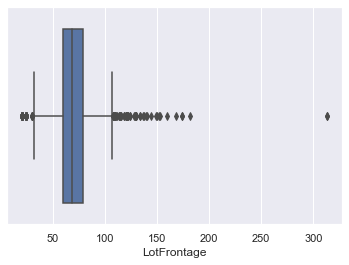

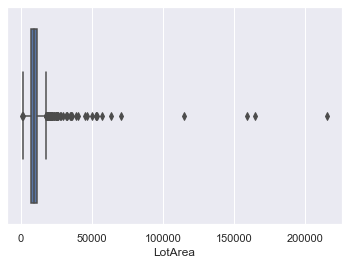

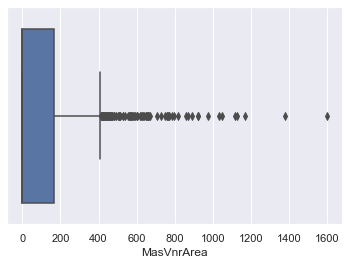

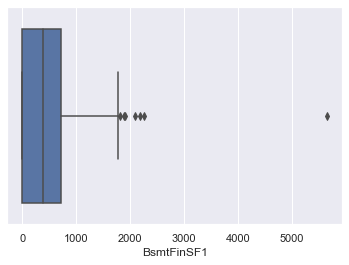

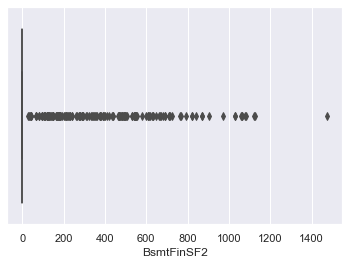

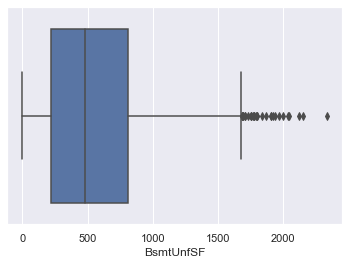

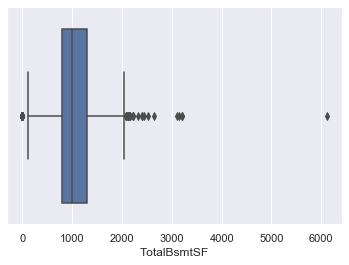

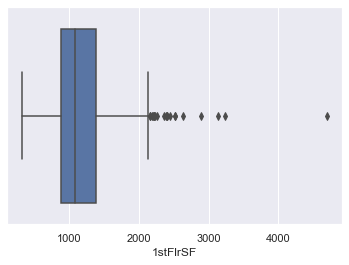

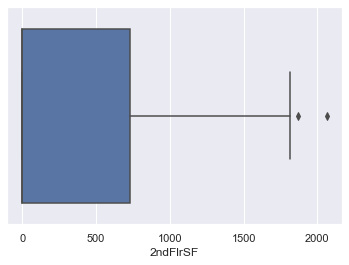

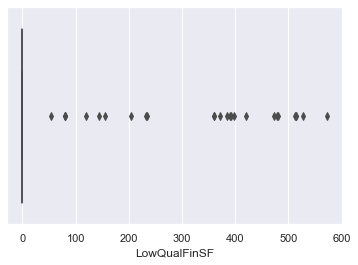

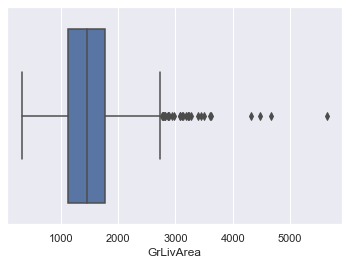

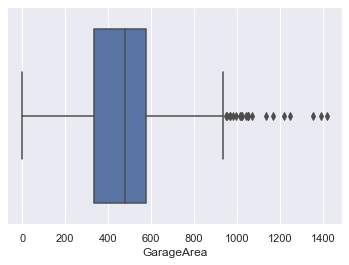

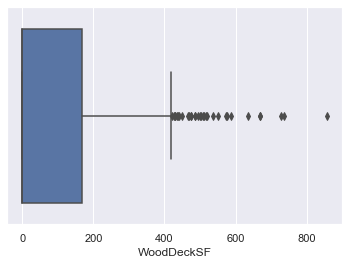

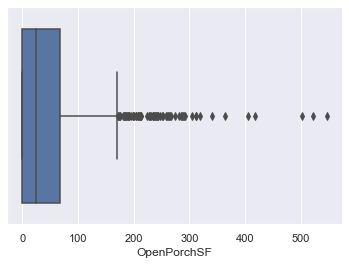

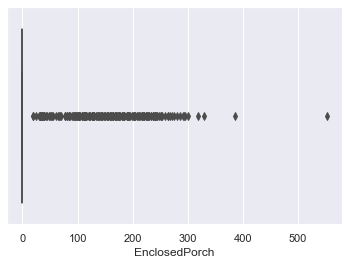

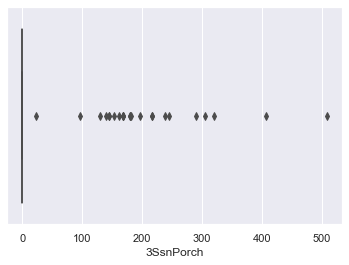

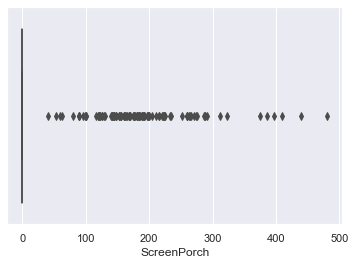

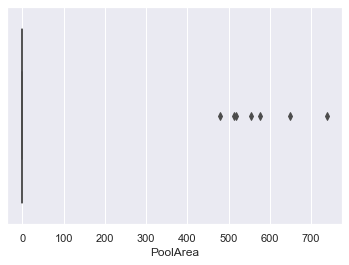

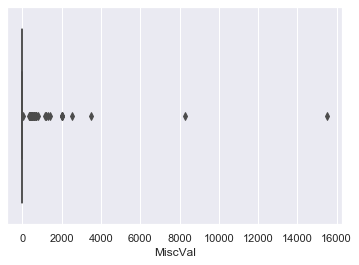

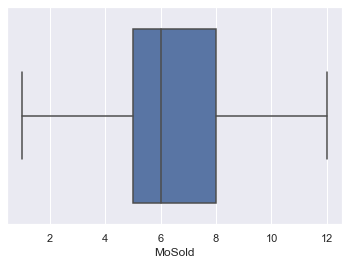

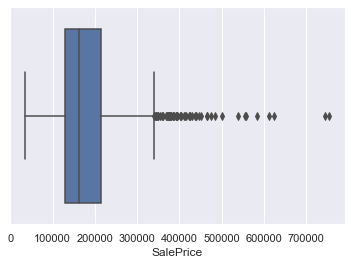

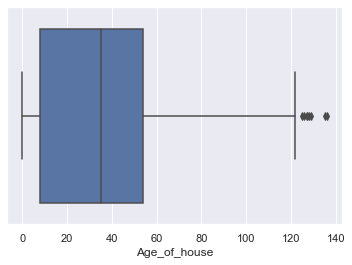

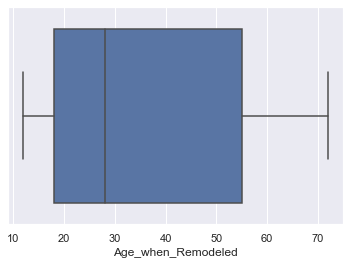

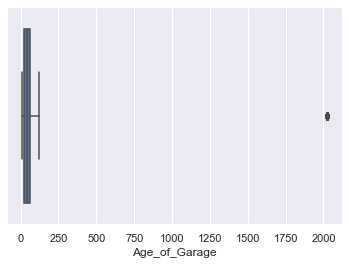

In [21]:
# Checking for outliers in the data ( in Numeric continous columns only ) using box plots
box_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age_of_house', 'Age_when_Remodeled',
       'Age_of_Garage']
for i in box_columns:
    sns.set(rc = {'figure.figsize':(6,4)})
    sns.boxplot(x=df[i])
    plt.show()

In [22]:
# Calculating the upper capping limit(UCL) for capping of outliers
for i in box_columns:
    Q1, Q3 = df[i].quantile([0.25,0.75])
    UCL = Q3 + 1.5 * (Q3 - Q1)
    LCL = Q3 - 1.5 * (Q3 - Q1)
    print(i,"UCL and LCL = ", round(UCL),round(LCL))

LotFrontage UCL and LCL =  108 50
LotArea UCL and LCL =  17674 5530
MasVnrArea UCL and LCL =  411 -82
BsmtFinSF1 UCL and LCL =  1781 -356
BsmtFinSF2 UCL and LCL =  0 0
BsmtUnfSF UCL and LCL =  1686 -70
TotalBsmtSF UCL and LCL =  2052 544
1stFlrSF UCL and LCL =  2155 627
2ndFlrSF UCL and LCL =  1820 -364
LowQualFinSF UCL and LCL =  0 0
GrLivArea UCL and LCL =  2748 806
GarageArea UCL and LCL =  938 214
WoodDeckSF UCL and LCL =  420 -84
OpenPorchSF UCL and LCL =  170 -34
EnclosedPorch UCL and LCL =  0 0
3SsnPorch UCL and LCL =  0 0
ScreenPorch UCL and LCL =  0 0
PoolArea UCL and LCL =  0 0
MiscVal UCL and LCL =  0 0
MoSold UCL and LCL =  12 4
SalePrice UCL and LCL =  340038 87962
Age_of_house UCL and LCL =  123 -15
Age_when_Remodeled UCL and LCL =  110 0
Age_of_Garage UCL and LCL =  128 0


In [23]:
# Capping all the outliers with the UCL and LCL value expect one's which are already under interquartile range
df["LotFrontage"] = df["LotFrontage"].map(
    lambda x: 108 if x > 108 else x)
df["LotFrontage"] = df["LotFrontage"].map(
    lambda x: 50 if x < 50 else x)
df["LotArea"] = df["LotArea"].map(
    lambda x: 17674 if x > 17674 else x)
df["LotArea"] = df["LotArea"].map(
    lambda x: 5530 if x < 5530 else x)
df["MasVnrArea"] = df["MasVnrArea"].map(
    lambda x: 411 if x > 411 else x)
df["BsmtFinSF1"] = df["BsmtFinSF1"].map(
    lambda x: 1781 if x > 1781 else x)
df["BsmtUnfSF"] = df["BsmtUnfSF"].map(
    lambda x: 1686 if x > 1686 else x)
df["TotalBsmtSF"] = df["TotalBsmtSF"].map(
    lambda x: 2052 if x > 2052 else x)
df["TotalBsmtSF"] = df["TotalBsmtSF"].map(
    lambda x: 544 if x < 544 else x)
df["1stFlrSF"] = df["1stFlrSF"].map(
    lambda x: 2155 if x > 2155 else x)
df["2ndFlrSF"] = df["2ndFlrSF"].map(
    lambda x: 1820 if x > 1820 else x)
df["GrLivArea"] = df["GrLivArea"].map(
    lambda x: 2748 if x > 2748 else x)
df["GarageArea"] = df["GarageArea"].map(
    lambda x: 938 if x > 938 else x)
df["WoodDeckSF"] = df["WoodDeckSF"].map(
    lambda x: 420 if x > 420 else x)
df["OpenPorchSF"] = df["OpenPorchSF"].map(
    lambda x: 170 if x > 170 else x)
df["SalePrice"] = df["SalePrice"].map(
    lambda x: 340038 if x > 340038 else x)
df["Age_of_house"] = df["Age_of_house"].map(
    lambda x: 123 if x > 123 else x)
df["Age_of_Garage"] = df["Age_of_Garage"].map(
    lambda x: 128 if x > 128 else x)

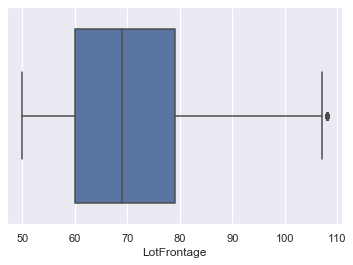

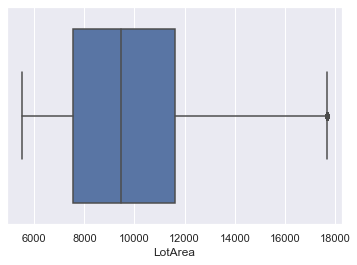

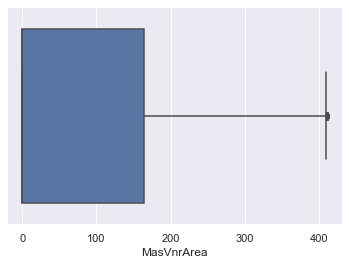

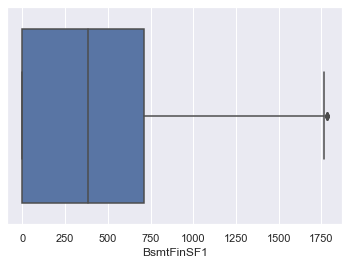

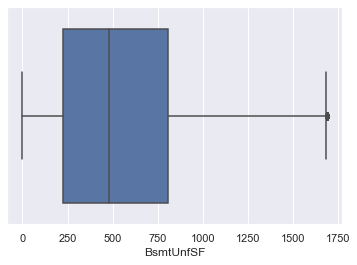

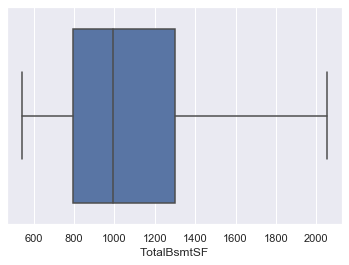

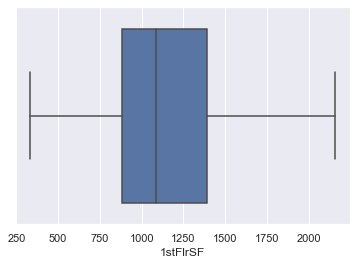

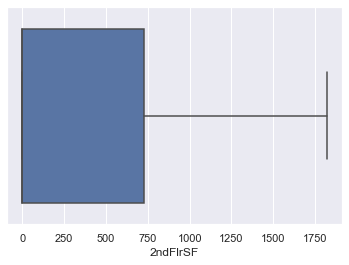

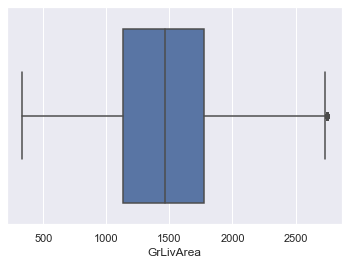

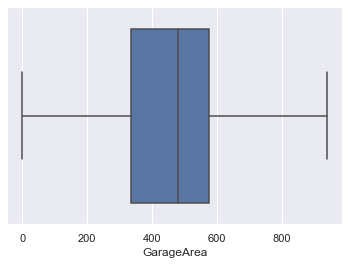

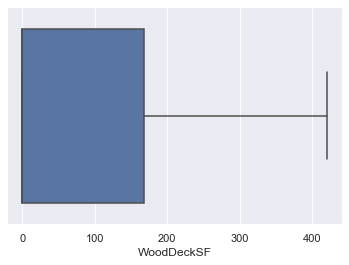

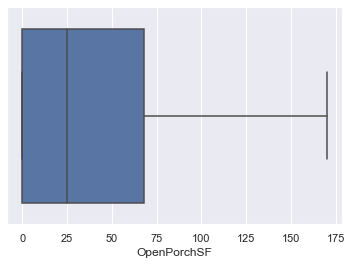

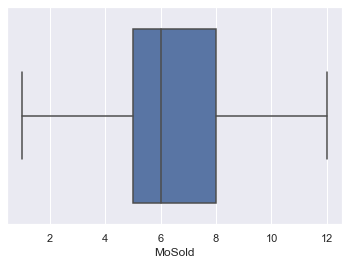

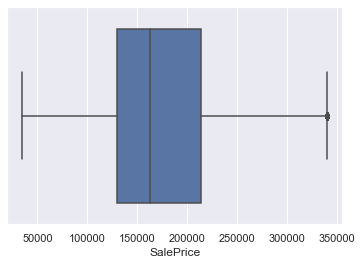

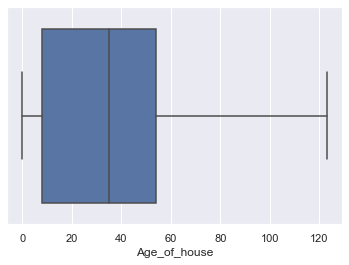

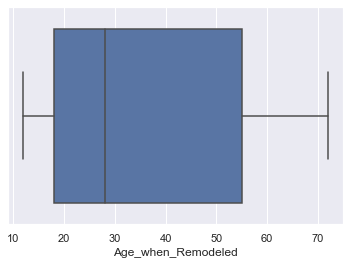

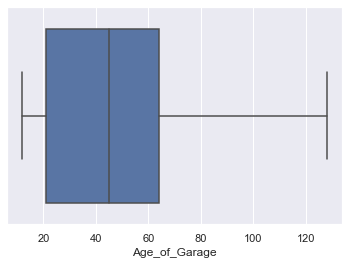

In [24]:
# How columns look after capping the outliers
box_columns2 = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'SalePrice', 'Age_of_house', 'Age_when_Remodeled',
       'Age_of_Garage']
for i in box_columns2:
    sns.set(rc = {'figure.figsize':(6,4)})
    sns.boxplot(x=df[i])
    plt.show()

In [25]:
df_numeric.describe()

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    69.863699   10516.828082   103.117123   443.639726   
std     421.610009    22.027677    9981.264932   180.731373   456.098091   
min       1.000000    21.000000    1300.000000     0.000000     0.000000   
25%     365.750000    60.000000    7553.500000     0.000000     0.000000   
50%     730.500000    69.000000    9478.500000     0.000000   383.500000   
75%    1095.250000    79.000000   11601.500000   164.250000   712.250000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       5.844521  1515.463699   472.980137    94.244521    46.660274   
std       48.623081   525.480383   213.804841   125.338794    66.256028   
min        0.000000   334.000000     0.000000     0.000000     0.000000   
25%        0.000000  1129.500000   334.500000     0.000000     0.000000   
50%        0.000000  1464.000000   480.000000     0.000000    25.000000   
75%        0.000000  1776.750000   576.000000   168.000000    68.000000   
max      572.000000  5642.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

            MoSold      SalePrice  Age_of_house  Age_when_Remodeled  
count  1460.000000    1460.000000   1460.000000         1460.000000  
mean      6.321918  180921.195890     36.547945           37.134247  
std       2.703626   79442.502883     30.250152           20.645407  
min       1.000000   34900.000000      0.000000           12.000000  
25%       5.000000  129975.000000      8.000000           18.000000  
50%       6.000000  163000.000000     35.000000           28.000000  
75%       8.000000  214000.000000     54.000000           55.000000  
max      12.000000  755000.000000    136.000000           72.000000

## Binning of variables

0       1293
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
258        1
230        1
232        1
239        1
240        1
264        1
273        1
276        1
306        1
311        1
324        1
334        1
181        1
1085       1
1120       1
125        1
28         1
32         1
35         1
40         1
68         1
80         1
81         1
105        1
106        1
108        1
110        1
119        1
121        1
123        1
127        1
177        1
128        1
132        1
139        1
144        1
149        1
150        1
163        1
165        1
168        1
169        1
173        1
174        1
344        1
175        1
336        1

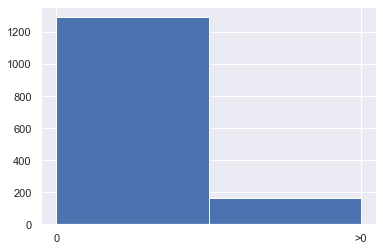

In [26]:
# Binning variables with UCL and LCL value = 0
print(df['BsmtFinSF2'].value_counts())
bins = [-1,0,1480]
df['BsmtFinSF2'] = pd.cut(df['BsmtFinSF2'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['BsmtFinSF2'], bins=2)
plt.show()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64


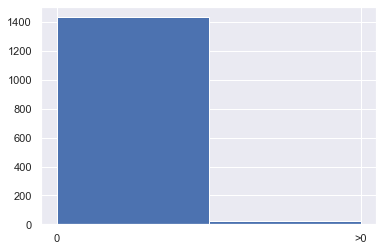

In [27]:
print(df['LowQualFinSF'].value_counts())
bins = [-1,0,580]
df['LowQualFinSF'] = pd.cut(df['LowQualFinSF'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['LowQualFinSF'], bins=2)
plt.show()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64


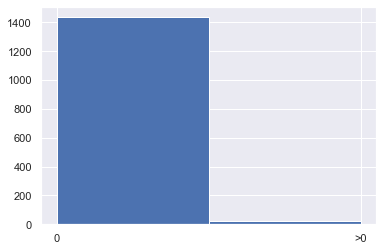

In [28]:
print(df['3SsnPorch'].value_counts())
bins = [-1,0,510]
df['3SsnPorch'] = pd.cut(df['3SsnPorch'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['3SsnPorch'], bins=2)
plt.show()

0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
140       1
161       1
128       1
122       1
410       1
119       1
116       1
99        1
95        1
80        1
63        1
60        1
53        1
40        1
130       1
175       1
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, dtype: int64


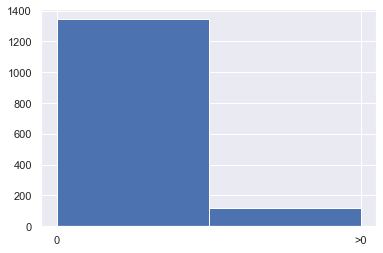

In [29]:
print(df['ScreenPorch'].value_counts())
bins = [-1,0,500]
df['ScreenPorch'] = pd.cut(df['ScreenPorch'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['ScreenPorch'], bins=2)
plt.show()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


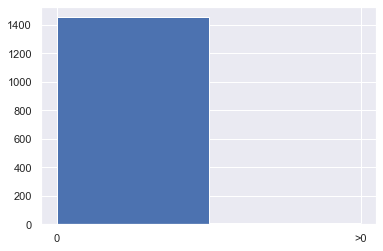

In [30]:
print(df['PoolArea'].value_counts())
bins = [-1,0,800]
df['PoolArea'] = pd.cut(df['PoolArea'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['PoolArea'], bins=2)
plt.show()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64


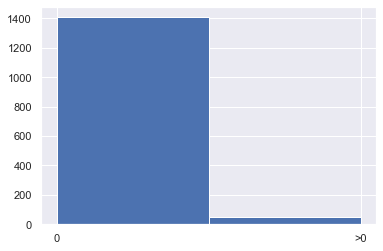

In [31]:
print(df['MiscVal'].value_counts())
bins = [-1,0,15500]
df['MiscVal'] = pd.cut(df['MiscVal'] , bins=bins, labels=['0','>0'], include_lowest=True)
plt.hist(df['MiscVal'], bins=2)
plt.show()

In [32]:
#converting binned variables from int type to object to treat the variables as categorical variables
k = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','LowQualFinSF','BsmtFinSF2']
for i in k:
    df[i] = df[i].astype('object')

# 3.)Data Visualisation

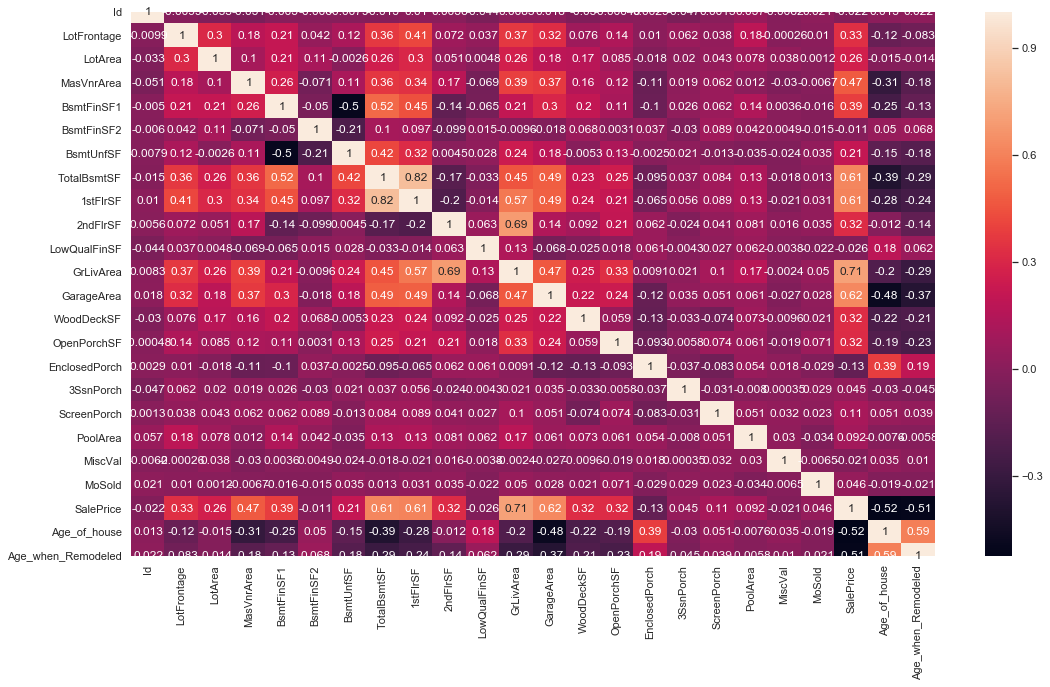

In [33]:
cor = df_numeric.corr()
# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

In [34]:
Generating pairplot to check the relationships between numeric variables variables
sns.pairplot(df_numeric)
plt.show()

In [35]:
# all numeric (float and int) variables in the dataset
df_categorical = df.select_dtypes(include=['object'])
df_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
plotting point plots to understand the association/mean and std deviation of  sales price with all categorical columns
N = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'SaleType', 'SaleCondition']
for i in N:
    ax = sns.pointplot(x=i , y='SalePrice', data=df)
    plt.show()

## INSIGHTS:
#### 1.People pay more for more living area.
#### 2.)From the above plots we can say that for GarageCars of 3, the SalePrice is more.
#### 3.From the above plots, we can say that for GarageArea of 200–1000 has most of the SalePrice.
#### 4.From the above plots, we can say that for 1stFirSF of 500–2000 has most of the SalePrice.
#### 5.)From the above plot, we can say that for TotRmsAbvGrd having more than 11 rows has less weight.May be those are old enough due to which they cost less, But it is just an assumption.
#### 6.)Most of the bike rentals are happening during non-holiday time.
#### 7.) The plot states that as OverallQual increases, the SalePrice also increases.The above assumption is true on normal assumption also, As OverallQual is more the SalePrice is also more.

## Data Preparation
#### 1.)Creating Dummy Variable
#### 2.) Standardisation of Variabes

In [37]:
# split into X and y
X = df.drop([ 'Id'], axis=1)

In [38]:
# creating dummy variables for categorical variables
# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
# convert into dummies
df_dummies = pd.get_dummies(house_categorical, drop_first=True)
df_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No Alley  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0               1           0             0             0             1   
1               1           0             0             0             1   
2               1           0             0             0             0   
3               1           0             0             0             0   
4               1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0       

In [40]:
# drop categorical variables 
df = df.drop(list(house_categorical.columns), axis=1)

In [41]:
# concat dummy variables with X
df = pd.concat([df, df_dummies], axis=1)

In [42]:
df.shape

(1460, 308)

In [43]:
X=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [44]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [45]:
X=X.drop(['Id'],axis=1)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 306 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(15), uint8(289)
memory usage: 606.1 KB


In [47]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Recursive feature elimination (RFE)
#### Since there are around 306 features, we will use RFE to get the best 75 features out of the 306 features and use the new features for further analysis

In [48]:
X_train.shape

(1021, 306)

In [49]:
# Running RFE with the output number of the variable equal to 75

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=75)            
rfe = rfe.fit(X_train, y_train)

In [50]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

Variable  rfe_support  rfe_ranking
0           MSSubClass_90         True            1
1          MSSubClass_160         True            1
2          MSSubClass_180         True            1
3          MSSubClass_190         True            1
4    Neighborhood_ClearCr         True            1
5    Neighborhood_Crawfor         True            1
6    Neighborhood_NoRidge         True            1
7         Condition1_PosA         True            1
8         Condition2_PosN         True            1
9         Condition2_RRAe         True            1
10        BldgType_2fmCon         True            1
11        BldgType_Duplex         True            1
12          OverallQual_2         True            1
13          OverallQual_3         True            1
14          OverallQual_4         True            1
15          OverallQual_5         True            1
16          OverallQual_6         True            1
17          OverallQual_7         True            1
18          OverallQual_8         True            1
19          OverallQual_9         True            1
20         OverallQual_10         True            1
21          OverallCond_2         True            1
22          OverallCond_3         True            1
23          OverallCond_4         True            1
24          OverallCond_5         True            1
25          OverallCond_6         True            1
26          OverallCond_7         True            1
27          OverallCond_8         True            1
28          OverallCond_9         True            1
29       RoofMatl_CompShg         True            1
30       RoofMatl_Membran         True            1
31         RoofMatl_Metal         True            1
32          RoofMatl_Roll         True            1
33       RoofMatl_Tar&Grv         True            1
34       RoofMatl_WdShake         True            1
35       RoofMatl_WdShngl         True            1
36    Exterior1st_AsphShn         True            1
37     Exterior1st_CBlock         True            1
38    Exterior2nd_AsphShn         True            1
39     Exterior2nd_CBlock         True            1
40           ExterQual_Fa         True            1
41        Foundation_Wood         True            1
42            BsmtQual_Fa         True            1
43            BsmtQual_Gd         True            1
44            BsmtQual_TA         True            1
45            BsmtCond_Po         True            1
46       BsmtFinType2_Unf         True            1
47          BsmtFinSF2_>0         True            1
48           Heating_OthW         True            1
49           HeatingQC_Po         True            1
50         BsmtFullBath_2         True            1
51             FullBath_2         True            1
52             FullBath_3         True            1
53         BedroomAbvGr_8         True            1
54         KitchenAbvGr_1         True            1
55         KitchenAbvGr_2         True            1
56         KitchenAbvGr_3         True            1
57         KitchenQual_Fa         True            1
58         KitchenQual_Gd         True            1
59         KitchenQual_TA         True            1
60        TotRmsAbvGrd_14         True            1
61         Functional_Sev         True            1
62           Fireplaces_3         True            1
63           GarageCars_4         True            1
64          GarageQual_Fa         True            1
65          GarageQual_Gd         True            1
66          GarageQual_Po         True            1
67          GarageQual_TA         True            1
68          GarageCond_Fa         True            1
69          GarageCond_Gd         True            1
70          GarageCond_Po         True            1
71          GarageCond_TA         True            1
72              PoolQC_Gd         True            1
73           SaleType_New         True            1
74  SaleCondition_Partial         True            1

In [51]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [52]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [53]:
X_train.shape

(1021, 75)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 75 columns):
MSSubClass_90            1021 non-null uint8
MSSubClass_160           1021 non-null uint8
MSSubClass_180           1021 non-null uint8
MSSubClass_190           1021 non-null uint8
Neighborhood_ClearCr     1021 non-null uint8
Neighborhood_Crawfor     1021 non-null uint8
Neighborhood_NoRidge     1021 non-null uint8
Condition1_PosA          1021 non-null uint8
Condition2_PosN          1021 non-null uint8
Condition2_RRAe          1021 non-null uint8
BldgType_2fmCon          1021 non-null uint8
BldgType_Duplex          1021 non-null uint8
OverallQual_2            1021 non-null uint8
OverallQual_3            1021 non-null uint8
OverallQual_4            1021 non-null uint8
OverallQual_5            1021 non-null uint8
OverallQual_6            1021 non-null uint8
OverallQual_7            1021 non-null uint8
OverallQual_8            1021 non-null uint8
OverallQual_9            1021 non-null

## Model Building and Evaluation

## Ridge Regression

In [55]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [56]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.2}
-22164.522924878274


In [58]:
# display the mean scores
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.003114      0.006227         0.003125        0.006249      0.0001   
1        0.003124      0.006248         0.003124        0.006248       0.001   
2        0.003113      0.006226         0.006271        0.007680        0.01   
3        0.007238      0.007080         0.005132        0.005847        0.05   
4        0.004398      0.002258         0.002091        0.001067         0.1   
5        0.003125      0.006249         0.006261        0.007668         0.2   
6        0.006249      0.007653         0.006236        0.007637         0.3   
7        0.006249      0.007653         0.003124        0.006248         0.4   
8        0.003113      0.006226         0.000000        0.000000         0.5   
9        0.006235      0.007637         0.000000        0.000000         0.6   
10       0.006261      0.007668         0.000000        0.000000         0.7   
11       0.003112      0.006225         0.000000        0.000000         0.8   
12       0.006237      0.007639         0.000000        0.000000         0.9   
13       0.006590      0.008089         0.000000        0.000000           1   
14       0.000000      0.000000         0.003133        0.006266           2   
15       0.003116      0.006232         0.006257        0.007663           3   
16       0.006236      0.007638         0.006261        0.007668           4   
17       0.006742      0.006237         0.002589        0.001589           5   
18       0.004988      0.005697         0.000527        0.001054           6   
19       0.003124      0.006248         0.000000        0.000000           7   
20       0.003124      0.006249         0.003132        0.006263           8   
21       0.004470      0.004426         0.004638        0.005556           9   
22       0.001014      0.002029         0.003138        0.006275          10   
23       0.006247      0.007651         0.006249        0.007653          20   
24       0.006249      0.007653         0.003124        0.006248          50   
25       0.003135      0.006270         0.006226        0.007625         100   
26       0.006260      0.007667         0.003113        0.006226         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -22045.390042      -23561.795217   
1    {'alpha': 0.001}      -22045.536081      -23560.781943   
2     {'alpha': 0.01}      -22047.034578      -23550.733042   
3     {'alpha': 0.05}      -22067.340580      -23507.811270   
4      {'alpha': 0.1}      -22099.024578      -23457.927442   
5      {'alpha': 0.2}      -22151.977584      -23368.086242   
6      {'alpha': 0.3}      -22214.499995      -23288.304808   
7      {'alpha': 0.4}      -22275.493945      -23216.231617   
8      {'alpha': 0.5}      -22328.828001      -23150.232775   
9      {'alpha': 0.6}      -22373.441495      -23097.767691   
10     {'alpha': 0.7}      -22409.655306      -23052.283763   
11     {'alpha': 0.8}      -22439.338565      -23032.701450   
12     {'alpha': 0.9}      -22463.850573      -23014.488177   
13     {'alpha': 1.0}      -22484.203281      -22997.085338   
14     {'alpha': 2.0}      -22608.175931      -22914.246657   
15     {'alpha': 3.0}      -22713.256856      -22876.019099   
16     {'alpha': 4.0}      -22798.382670      -22909.704170   
17     {'alpha': 5.0}      -22898.460918      -22994.581852   
18     {'alpha': 6.0}      -23051.747689      -23142.894192   
19     {'alpha': 7.0}      -23212.444464      -23310.794626   
20     {'alpha': 8.0}      -23360.670692      -23470.918520   
21     {'alpha': 9.0}      -23500.574724      -23624.944917   
22    {'alpha': 10.0}      -23634.828009      -23782.115926   
23      {'alpha': 20}      -24864.275655      -25572.212979   
24      {'alpha': 50}      -27372.906167      -29160.362663   
25     {'alpha': 100}      -30268.519569      -32153.534074   
26     {'alpha': 500}      -38761.179779      -39538.033390   

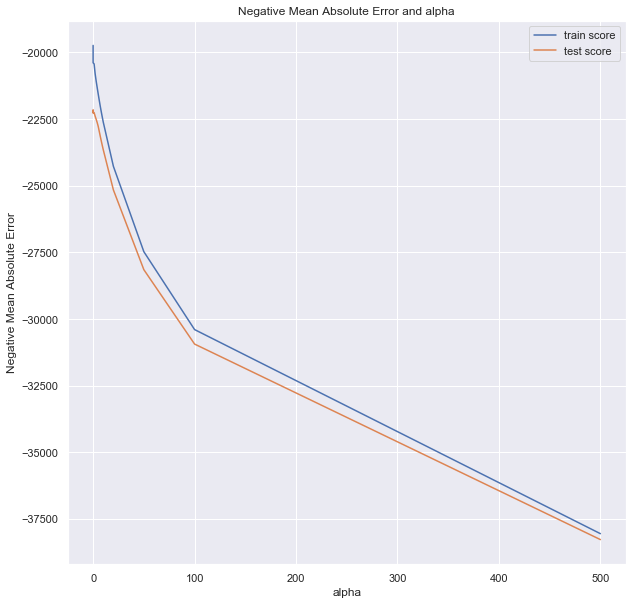

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(10,10))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
# check the coefficient values with lambda = 10

alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([   2908.26902252,  -35200.08781136,  -28759.64093393,
          1388.69306925,   38698.21827211,   30478.99497776,
         48478.2947988 ,   28964.70844236, -127497.46786328,
         33161.92759014,    1388.69306926,    2908.26902252,
        -76201.49784495,  -35004.40057346,  -31145.14874636,
        -22657.02385107,   -9644.09619308,   10443.99559398,
         53323.7563708 ,   75606.1082047 ,   55169.55973392,
         15845.46164157,  -23092.56264591,   -7365.44098484,
         -1583.44294421,    1906.20809789,    4926.28737767,
          3498.00340434,   25756.73874803,   17293.44707085,
         33240.90032738,   19587.58516979,   26065.23459239,
         37717.51862445,   18453.74031772,   25313.47341874,
          2434.54827365,    2794.50989846,    2434.54827365,
          2794.50989846,  -27383.7165701 ,   31096.90999496,
        -45503.01329297,  -27991.13611475,  -37352.26610703,
        -19891.25269451,   53487.09137165,   62644.16108134,
        -69798.6931159 ,

In [76]:
#lets predict the R-squared value and RMSE value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print ('RMSE is: \n', mean_squared_error(y_test, ridge.predict(X_test)))

0.8493925315158765
RMSE is: 
 1233290848.3174057


# Lasso Regression

In [62]:
lasso = Lasso()
import warnings
warnings.filterwarnings('ignore')

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.052032      0.007201         0.002801        0.003924      0.0001   
1        0.043974      0.004919         0.002000        0.004000       0.001   
2        0.040037      0.000019         0.002000        0.004001        0.01   
3        0.043916      0.005061         0.002390        0.003860        0.05   
4        0.050876      0.006781         0.000598        0.001197         0.1   
5        0.036540      0.010785         0.005123        0.006522         0.2   
6        0.047624      0.007198         0.000598        0.001197         0.3   
7        0.043754      0.006232         0.006253        0.007658         0.4   
8        0.044069      0.011364         0.000000        0.000000         0.5   
9        0.046873      0.000021         0.003114        0.006228         0.6   
10       0.046872      0.000033         0.000000        0.000000         0.7   
11       0.037488      0.007650         0.000000        0.000000         0.8   
12       0.043758      0.006258         0.006239        0.007642         0.9   
13       0.053103      0.007622         0.000000        0.000000           1   
14       0.037478      0.007664         0.006261        0.007669           2   
15       0.043739      0.006248         0.003124        0.006249           3   
16       0.043749      0.006276         0.000000        0.000000           4   
17       0.040593      0.007660         0.006262        0.007670           5   
18       0.031242      0.000033         0.003124        0.006249           6   
19       0.031241      0.013973         0.000000        0.000000           7   
20       0.025004      0.012490         0.003128        0.006255           8   
21       0.025389      0.012190         0.006251        0.007656           9   
22       0.024996      0.007667         0.003123        0.006247          10   
23       0.015619      0.000032         0.003124        0.006247          20   
24       0.003124      0.006248         0.003117        0.006233          50   
25       0.006249      0.007653         0.003123        0.006246         100   
26       0.006249      0.007654         0.000000        0.000000         500   
27       0.006248      0.007652         0.000000        0.000000        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -22045.372838      -23585.217375   
1    {'alpha': 0.001}      -22045.364344      -23584.424109   
2     {'alpha': 0.01}      -22045.296929      -23576.491453   
3     {'alpha': 0.05}      -22045.045830      -23561.853773   
4      {'alpha': 0.1}      -22044.717879      -23561.712699   
5      {'alpha': 0.2}      -22044.061976      -23560.204912   
6      {'alpha': 0.3}      -22043.406073      -23558.604434   
7      {'alpha': 0.4}      -22042.750171      -23557.003957   
8      {'alpha': 0.5}      -22041.923290      -23555.403480   
9      {'alpha': 0.6}      -22041.232397      -23553.803002   
10     {'alpha': 0.7}      -22040.542167      -23552.202525   
11     {'alpha': 0.8}      -22039.851936      -23550.564733   
12     {'alpha': 0.9}      -22039.077064      -23548.959583   
13     {'alpha': 1.0}      -22038.385077      -23547.354441   
14     {'alpha': 2.0}      -22031.396382      -23532.544268   
15     {'alpha': 3.0}      -22024.407683      -23517.457916   
16     {'alpha': 4.0}      -22030.294263      -23502.371564   
17     {'alpha': 5.0}      -22051.218177      -23485.637659   
18     {'alpha': 6.0}      -22072.267987      -23469.211133   
19     {'alpha': 7.0}      -22089.352012      -23452.526499   
20     {'alpha': 8.0}      -22107.075865      -23435.842873   
21     {'alpha': 9.0}      -22126.192919      -23419.156369   
22    {'alpha': 10.0}      -22145.406938      -23402.473165   
23      {'alpha': 20}      -22266.751622      -23258.272987   
24      {'alpha': 50}      -22454.063395      -23049.549799   
25     {'alpha': 100}      -22832.570025     

In [64]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [65]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.048540      0.006184         0.002195        0.001829      0.0001   
1        0.049998      0.006245         0.000000        0.000000       0.001   
2        0.052452      0.008276         0.003124        0.006249        0.01   
3        0.050243      0.006756         0.000609        0.001218        0.05   
4        0.046521      0.000758         0.005388        0.007034         0.1   
5        0.043749      0.011693         0.000000        0.000000         0.2   
6        0.046855      0.000034         0.003124        0.006248         0.3   
7        0.040635      0.007648         0.006239        0.007641         0.4   
8        0.044104      0.006467         0.006246        0.007650         0.5   
9        0.040622      0.007660         0.003125        0.006250         0.6   
10       0.046862      0.000029         0.000000        0.000000         0.7   
11       0.043729      0.006245         0.009375        0.007654         0.8   
12       0.050339      0.011606         0.006250        0.007654         0.9   
13       0.068724      0.007661         0.000000        0.000000           1   
14       0.046873      0.009895         0.006249        0.007653           2   
15       0.050334      0.006135         0.000000        0.000000           3   
16       0.043758      0.006234         0.003115        0.006231           4   
17       0.037473      0.007650         0.003134        0.006268           5   
18       0.040615      0.007669         0.000000        0.000000           6   
19       0.044150      0.012357         0.003124        0.006249           7   
20       0.034367      0.006248         0.006248        0.007653           8   
21       0.031243      0.009880         0.009373        0.007653           9   
22       0.021869      0.007654         0.003124        0.006249          10   
23       0.018746      0.006249         0.006249        0.007653          20   
24       0.003124      0.006249         0.003124        0.006248          50   
25       0.009372      0.007653         0.000000        0.000000         100   
26       0.000000      0.000000         0.009615        0.007863         500   
27       0.009372      0.007653         0.003124        0.006249        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.811117           0.738527   
1    {'alpha': 0.001}           0.811117           0.738616   
2     {'alpha': 0.01}           0.811117           0.739499   
3     {'alpha': 0.05}           0.811117           0.742342   
4      {'alpha': 0.1}           0.811117           0.742443   
5      {'alpha': 0.2}           0.811118           0.742488   
6      {'alpha': 0.3}           0.811118           0.742535   
7      {'alpha': 0.4}           0.811118           0.742582   
8      {'alpha': 0.5}           0.811119           0.742629   
9      {'alpha': 0.6}           0.811119           0.742676   
10     {'alpha': 0.7}           0.811119           0.742723   
11     {'alpha': 0.8}           0.811118           0.742766   
12     {'alpha': 0.9}           0.811120           0.742813   
13     {'alpha': 1.0}           0.811119           0.742859   
14     {'alpha': 2.0}           0.811098           0.743358   
15     {'alpha': 3.0}           0.811054           0.743882   
16     {'alpha': 4.0}           0.810998           0.744398   
17     {'alpha': 5.0}           0.810916           0.744904   
18     {'alpha': 6.0}           0.810809           0.745347   
19     {'alpha': 7.0}           0.810670           0.745718   
20     {'alpha': 8.0}           0.810515           0.746081   
21     {'alpha': 9.0}           0.810310           0.746436   
22    {'alpha': 10.0}           0.810094           0.746783   
23      {'alpha': 20}           0.808916           0.750052   
24      {'alpha': 50}           0.807853           0.758819   
25     {'alpha': 100}           0.803125     

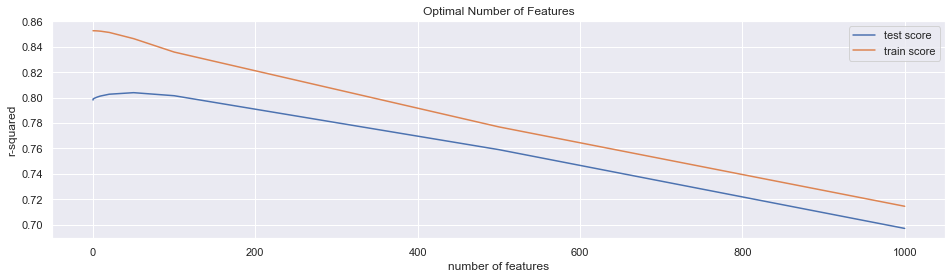

In [66]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [67]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-22109.29037981877


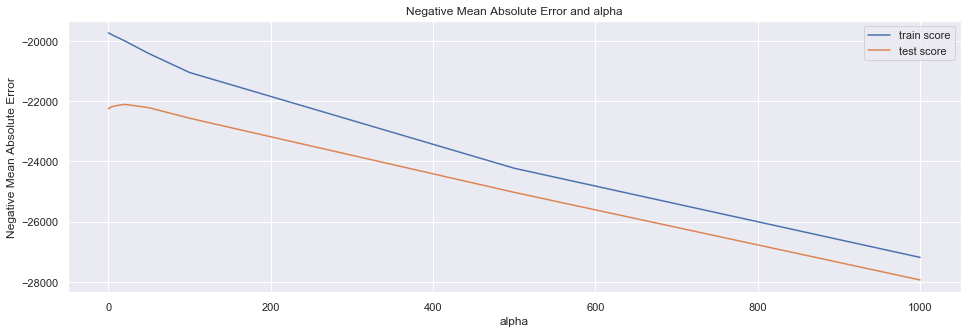

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [77]:
alpha = 10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [78]:
#lets predict the R-squared value and RMSE value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print ('RMSE is: \n', mean_squared_error(y_test, lasso.predict(X_test)))

0.8497845380522401
RMSE is: 
 1376564570.3427558


In [71]:
#Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0          MSSubClass_90    5358.0177
1         MSSubClass_160  -35272.9303
2         MSSubClass_180  -29722.9794
3         MSSubClass_190     441.8036
4   Neighborhood_ClearCr   37274.2857
5   Neighborhood_Crawfor   30849.3574
6   Neighborhood_NoRidge   48186.7428
7        Condition1_PosA   29992.1735
8        Condition2_PosN -159704.9234
9        Condition2_RRAe   40693.1545
10       BldgType_2fmCon    2088.6879
11       BldgType_Duplex      35.3268
12         OverallQual_2 -102211.1927
13         OverallQual_3  -54019.8607
14         OverallQual_4  -49909.2679
15         OverallQual_5  -41354.2634
16         OverallQual_6  -28349.6171
17         OverallQual_7   -8502.0964
18         OverallQual_8   34526.8544
19         OverallQual_9   56282.1153
20        OverallQual_10   41924.2056
21         OverallCond_2   14827.9175
22         OverallCond_3  -26610.5598
23         OverallCond_4  -10265.3681
24         OverallCond_5   -4687.2933
25         OverallCond_6   -1374.5960
26         OverallCond_7    1653.1743
27         OverallCond_8     463.3202
28         OverallCond_9   22552.2269
29      RoofMatl_CompShg   -7500.6386
30      RoofMatl_Membran   16845.0001
31        RoofMatl_Metal       0.0531
32         RoofMatl_Roll    7342.8168
33      RoofMatl_Tar&Grv   17745.2685
34      RoofMatl_WdShake   -6152.0265
35      RoofMatl_WdShngl    -354.3471
36   Exterior1st_AsphShn    6189.6507
37    Exterior1st_CBlock    8611.5258
38    Exterior2nd_CBlock       0.0085
39          ExterQual_Fa  -29738.1232
40       Foundation_Wood   34214.9525
41           BsmtQual_Fa  -45626.4982
42           BsmtQual_Gd  -28310.6079
43           BsmtQual_TA  -37629.1530
44           BsmtCond_Po  -43575.6737
45      BsmtFinType2_Unf   54100.3290
46         BsmtFinSF2_>0   63248.8487
47          Heating_OthW  -84081.2214
48          HeatingQC_Po  -38328.8724
49        BsmtFullBath_2   60955.7951
50            FullBath_2   28742.1853
51            FullBath_3   49408.2733
52        BedroomAbvGr_8   71477.9093
53        KitchenAbvGr_1   25516.1241
54        KitchenAbvGr_3  -10183.8081
55        KitchenQual_Fa  -45999.9119
56        KitchenQual_Gd  -29595.9597
57        KitchenQual_TA  -40811.5790
58       TotRmsAbvGrd_14   36684.7619
59        Functional_Sev  -78475.9785
60          Fireplaces_3   27288.9136
61          GarageCars_4   40393.9090
62         GarageQual_Fa   -4179.9884
63         GarageQual_Gd   45149.9400
64         GarageQual_Po  -21226.5311
65         GarageQual_TA   14011.4191
66         GarageCond_Fa   -2136.3998
67         GarageCond_Gd  -14981.3993
68         GarageCond_Po   15679.8170
69         GarageCond_TA    6546.8376
70             PoolQC_Gd -259534.1826
71          SaleType_New   11311.2741

# Conclusion :
#### The optimal lambda value in case of Ridge and Lasso is as below:

#### Ridge - 0.2
#### Lasso - 10
#### The R Squared value in case of Ridge and Lasso are:

#### Ridge - 0.8493
#### Lasso - 0.8497

#### The RMSE value in case of Ridge and Lasso are:

#### Ridge - 862342848.7406102
#### Lasso - 1069309274.8658706

#### The R Squared Value of Lasso is slightly higher than that of Ridge

#### Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

#### Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Ridge:

In [72]:
#Change the alpha value from 0.2 to 0.4
alpha = 0.4
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8493925315158765
0.7227178594455519
697766171149.2766
540181391563.0237
683414467.3352367
1233290848.3174057


### R2score on training data has decreased but it has increased on testing data

## Lasso

In [84]:
#Changed alpha 10 to 20
alpha =20
lasso20 = Lasso(alpha=alpha)
lasso20.fit(X_train, y_train)

Lasso(alpha=20)

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso20.predict(X_train)
y_pred_test = lasso20.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8486495212465435
0.7069829335203139
701208546457.5881
570835057772.6117
686786039.6254536
1303276387.6087024


### score of training data has decrease and it has increase on testing data

In [90]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge2          Ridge          Lasso  \
MSSubClass_90           2908.269023    2908.269023    3609.379644   
MSSubClass_160        -35200.087811  -35200.087811  -35120.448001   
MSSubClass_180        -28759.640934  -28759.640934  -28054.033538   
MSSubClass_190          1388.693069    1388.693069    1142.794862   
Neighborhood_ClearCr   38698.218272   38698.218272   37952.458240   
Neighborhood_Crawfor   30478.994978   30478.994978   30438.062940   
Neighborhood_NoRidge   48478.294799   48478.294799   48031.162696   
Condition1_PosA        28964.708442   28964.708442   27869.573687   
Condition2_PosN      -127497.467863 -127497.467863 -147053.019579   
Condition2_RRAe        33161.927590   33161.927590   29573.094109   
BldgType_2fmCon         1388.693069    1388.693069      91.278346   
BldgType_Duplex         2908.269023    2908.269023     188.042072   
OverallQual_2         -76201.497845  -76201.497845  -69340.319567   
OverallQual_3         -35004.400573  -35004.400573  -25308.096237   
OverallQual_4         -31145.148746  -31145.148746  -21477.269972   
OverallQual_5         -22657.023851  -22657.023851  -13009.928723   
OverallQual_6          -9644.096193   -9644.096193       2.304929   
OverallQual_7          10443.995594   10443.995594   19977.142203   
OverallQual_8          53323.756371   53323.756371   62980.485807   
OverallQual_9          75606.108205   75606.108205   85556.661491   
OverallQual_10         55169.559734   55169.559734   68817.321463   
OverallCond_2          15845.461642   15845.461642   10132.647516   
OverallCond_3         -23092.562646  -23092.562646  -24485.398508   
OverallCond_4          -7365.440985   -7365.440985   -8971.066998   
OverallCond_5          -1583.442944   -1583.442944   -3266.042858   
OverallCond_6           1906.208098    1906.208098       0.000000   
OverallCond_7           4926.287378    4926.287378    3033.153219   
OverallCond_8           3498.003404    3498.003404    1496.254466   
OverallCond_9          25756.738748   25756.738748   23182.876634   
RoofMatl_CompShg       17293.447071   17293.447071   -7072.432971   
RoofMatl_Membran       33240.900327   33240.900327    6178.360344   
RoofMatl_Metal         19587.585170   19587.585170      -0.000000   
RoofMatl_Roll          26065.234592   26065.234592       0.000000   
RoofMatl_Tar&Grv       37717.518624   37717.518624   13351.603928   
RoofMatl_WdShake       18453.740318   18453.740318   -2355.486357   
RoofMatl_WdShngl       25313.473419   25313.473419       0.000000   
Exterior1st_AsphShn     2434.548274    2434.548274       0.000000   
Exterior1st_CBlock      2794.509898    2794.509898       0.000000   
Exterior2nd_AsphShn     2434.548274    2434.548274       0.000000   
Exterior2nd_CBlock      2794.509898    2794.509898       0.000000   
ExterQual_Fa          -27383.716570  -27383.716570  -25669.978503   
Foundation_Wood        31096.909995   31096.909995   29051.411783   
BsmtQual_Fa           -45503.013293  -45503.013293  -45855.762253   
BsmtQual_Gd           -27991.136115  -27991.136115  -27657.955633   
BsmtQual_TA           -37352.266107  -37352.266107  -36978.836774   
BsmtCond_Po           -19891.252695  -19891.252695   -6706.162536   
BsmtFinType2_Unf       53487.091372   53487.091372   53161.231758   
BsmtFinSF2_>0          62644.161081   62644.161081   62388.248223   
Heating_OthW          -69798.693116  -69798.693116  -73625.311536   
HeatingQC_Po          -32139.041649  -32139.041649  -28308.677623   
BsmtFullBath_2         55970.269278   55970.269278   58360.560595   
FullBath_2             28609.120707   28609.120707   28553.185923   
FullBath_3             48926.756109   48926.756109   49160.825142   
BedroomAbvGr_8         47784.737295   47784.737295   48885.997145   
KitchenAbvGr_1         17876.085724   17876.085724   22933.848000   
KitchenAbvGr_2         -6939.284776   -6939.284776      -0.000000   
KitchenAbvGr_3        -10936.800948  -10936.800948      -0.000000   
KitchenQual_Fa        -4584

#### GarageQual_Gd	
#### OverallQual_10
#### TotRmsAbvGrd_14
#### BedroomAbvGr_8
#### BsmtFullBath_2
#### BsmtFinSF2_>0
#### Neighborhood_ClearCr
#### BsmtFinType2_Unf
#### RoofMatl_Tar&Grv
#### OverallQual_9
#### OverallQual_8

In [91]:
X_train

MSSubClass_90  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
210               0               0               0               0   
318               0               0               0               0   
239               0               0               0               0   
986               0               0               0               0   
1416              0               0               0               1   
390               0               0               0               0   
1005              0               0               0               0   
568               0               0               0               0   
342               1               0               0               0   
114               0               0               0               0   
499               0               0               0               0   
365               0               0               0               0   
308               0               0               0               0   
797               0               0               0               0   
703               0               0               0               1   
858               0               0               0               0   
25                0               0               0               0   
88                0               0               0               0   
1129              1               0               0               0   
1425              0               0               0               0   
728               1               0               0               0   
883               0               0               0               0   
606               0               0               0               0   
1183              0               0               0               0   
808               0               0               0               0   
452               0               0               0               0   
1395              0               0               0               0   
1078              0               0               0               0   
146               0               0               0               0   
906               0               0               0               0   
614               0               0               1               0   
405               0               0               0               0   
45                0               0               0               0   
1443              0               0               0               0   
1241              0               0               0               0   
537               0               0               0               0   
454               1               0               0               0   
160               0               0               0               0   
1433              0               0               0               0   
1037              0               0               0               0   
106               0               0               0               0   
1307              0               0               0               0   
876               0               0               0               0   
771               0               0               0               0   
890               0               0               0               0   
420               1               0               0               0   
1446              0               0               0               0   
1315              0               0               0               0   
384               0               0               0               0   
1047              0               0               0               0   
1333              0               0               0               0   
1337              0               0               0               0   
125               0               0               0               1   
709               0               0               0               0   
1332              0               0               0               0   
1316              0           

In [92]:
y_train

210      98000
318     260000
239     113000
986     117000
1416    122500
390     119000
1005    149900
568     316600
342      87500
114     259500
499     120000
365     147000
308      82500
797     110000
703     140000
858     152000
25      256300
88       85000
1129    140000
1425    142000
728     110000
883     118500
606     152000
1183    120000
808     159950
452     204000
1395    281213
1078    155900
146     105000
906     255000
614      75500
405     150000
45      319900
1443    121000
1241    248328
537     111250
454     188000
160     162500
1433    186500
1037    287000
106     100000
1307    138000
876     132250
771     102000
890     122900
420     206300
1446    157900
1315    206900
384     240000
1047    145000
1333    125500
1337     52500
125      84500
709     109900
1332    100000
1316    295493
147     222500
713     129000
687     148800
1287    190000
531     128000
520     106250
51      114500
205     180500
1109    280000
573     170000
1133    23

In [93]:
X_train.columns

Index(['MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Condition1_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_2fmCon', 'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'ExterQual_Fa', 'Foundation_Wood', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po', 'BsmtFinType2_Unf',
       'BsmtFinSF2_>0', 'Heating_OthW', '

### 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190','Neighborhood_ClearCr' are the top 5 important predictors.

### Dropping top 5 varaibles 

In [96]:
X_train2 = X_train.drop(['MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'Neighborhood_ClearCr'],axis=1)
X_test2 = X_test.drop(['MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'Neighborhood_ClearCr'],axis=1)

## Applying Lasso to find new top 5 predictors

In [97]:
# alpha 10 
alpha =10
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train)

Lasso(alpha=10)

In [98]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8323327415310201
0.6628226186749455
776804378604.4325
656865049741.5614
760827011.3657517
1499691894.3871264


### R2score of training and testing data has decreased

In [100]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Lasso21
Neighborhood_Crawfor   31782.173285
Neighborhood_NoRidge   49555.051891
Condition1_PosA        28003.870861
Condition2_PosN      -148312.438368
Condition2_RRAe        30726.227160
BldgType_2fmCon         2249.279719
BldgType_Duplex         3985.482915
OverallQual_2         -65616.862094
OverallQual_3         -25033.285329
OverallQual_4         -21004.749921
OverallQual_5         -10947.555326
OverallQual_6              2.289813
OverallQual_7          20351.799522
OverallQual_8          64339.045581
OverallQual_9          84748.968958
OverallQual_10         67121.571372
OverallCond_2          11878.141860
OverallCond_3         -26552.180698
OverallCond_4          -6225.127971
OverallCond_5          -2841.731594
OverallCond_6              0.000000
OverallCond_7           4185.731603
OverallCond_8           1872.858280
OverallCond_9          24377.659848
RoofMatl_CompShg      -17460.926871
RoofMatl_Membran       35455.462418
RoofMatl_Metal         19544.315564
RoofMatl_Roll             -0.000000
RoofMatl_Tar&Grv       20489.118676
RoofMatl_WdShake       -1489.202852
RoofMatl_WdShngl           0.000000
Exterior1st_AsphShn        0.000000
Exterior1st_CBlock         0.000000
Exterior2nd_AsphShn        0.000000
Exterior2nd_CBlock         0.000000
ExterQual_Fa          -24650.978466
Foundation_Wood        31479.820449
BsmtQual_Fa           -44903.754808
BsmtQual_Gd           -29452.024241
BsmtQual_TA           -37773.302623
BsmtCond_Po            -5960.236617
BsmtFinType2_Unf       51758.376370
BsmtFinSF2_>0          61649.123777
Heating_OthW          -71557.910641
HeatingQC_Po          -27466.545199
BsmtFullBath_2         61631.858078
FullBath_2             28218.941512
FullBath_3             51046.401907
BedroomAbvGr_8         50058.481579
KitchenAbvGr_1         23187.049306
KitchenAbvGr_2            -0.000000
KitchenAbvGr_3            -0.000000
KitchenQual_Fa        -47436.705271
KitchenQual_Gd        -30410.713403
KitchenQual_TA        -42336.779955
TotRmsAbvGrd_14        43961.598281
Functional_Sev        -77955.632828
Fireplaces_3           32462.395287
GarageCars_4           39120.700737
GarageQual_Fa          -1467.321119
GarageQual_Gd          40803.140824
GarageQual_Po          -4499.137179
GarageQual_TA          14775.649893
GarageCond_Fa          -2379.554281
GarageCond_Gd         -10449.192507
GarageCond_Po           4842.990782
GarageCond_TA           6796.843706
PoolQC_Gd            -261790.196758

### The new five most important predictor variables

### OverallQual_8
### OverallQual_9
### OverallQual_10
### BsmtFullBath_2
### BsmtFinSF2_>0